# Regression of Time of Day Accidents Occurred vs. Day of the Week Accidents Occurred

In [20]:
# Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling libraries
from scipy.stats import linregress

In [2]:
# Read in the cleaned data
df = pd.read_csv("../Data/cleaned_car_crash_data.csv")

# Display first 5 rows
df.head()

,index,year,month,day,hour,collision_type,injury_type,primary_factor,reported_location,latitude,longitude
0,0,2015,1,5,0.0,2-Car,No injury/unknown,OTHER,1ST & FESS,39.159207,-86.525874
1,1,2015,1,6,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2,2015,1,6,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,3,2015,1,7,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,4,2015,1,7,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


### Scatterplot of Time of Day vs. Latitude
---

In [18]:
# Removing any data points with incorrect latitudes
crash_df = df.loc[df.latitude > 10].reset_index()

In [53]:
# Getting a sample of 1000 data points
sample = crash_df.sample(500)

The r2-value is: 0.0021536410669085585
The line equation is: y = 0.0x + 39.16


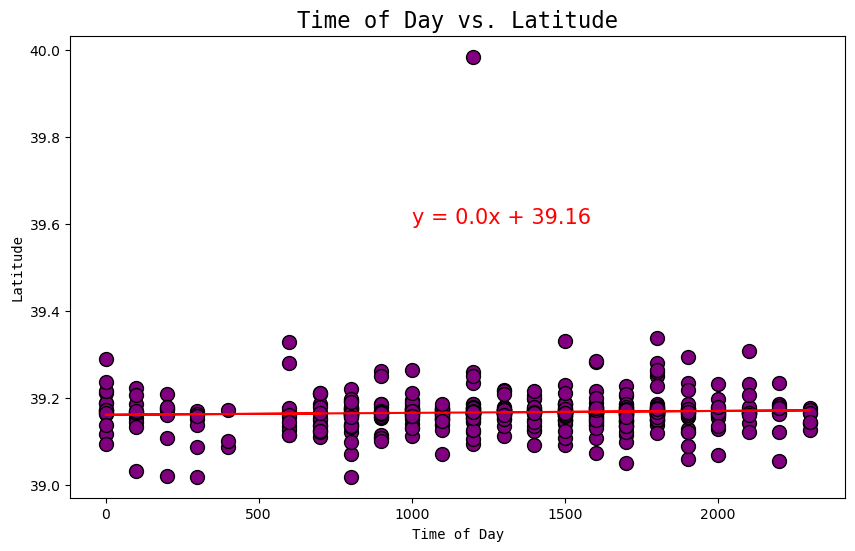

In [62]:
# Scatterplot
# Step 1: Get the Data
x = sample.hour
y = sample.latitude

# Makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Make the canvas
plt.figure(figsize=(10,6))

# Make the basic plot
plt.scatter(x,y, facecolor="purple", edgecolor="black", s=100)
plt.plot(x,regress_values,"r-")

# Customizations
plt.title("Time of Day vs. Latitude", fontsize=16, fontfamily="monospace")
plt.xlabel("Time of Day", fontfamily="monospace")
plt.ylabel("Latitude", fontfamily="monospace")

plt.grid(color="lightgrey", linestyle="--", alpha=0)

plt.annotate(line_eq,(1000,39.6),fontsize=15,color="red")


print(f"The r2-value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")
plt.show()

### Scatterplot of Time of Day vs. Year
---

In [11]:
# Getting a sample of 1000 data points
sample2 = df.sample(1000)

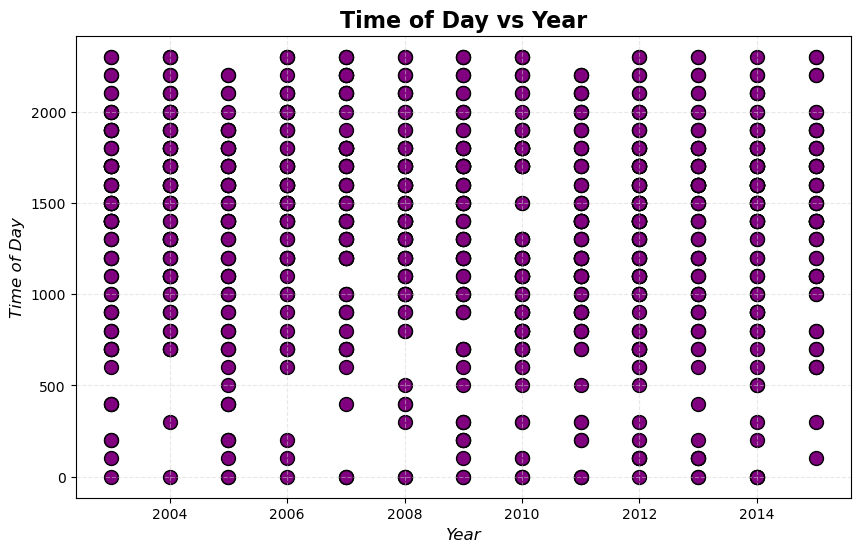

In [14]:
# Scatterplot

# Step 1: Get the Data
x = sample.year
y = sample.hour

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Year", fontsize=12, fontstyle="italic")
plt.ylabel("Time of Day", fontsize=12, fontstyle="italic")
plt.title("Time of Day vs Year", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

### Statistical Tests for Hours of Day per Day of Week
---

In [ ]:
# Violin Plots showing distribution

<function matplotlib.pyplot.show(close=None, block=None)>

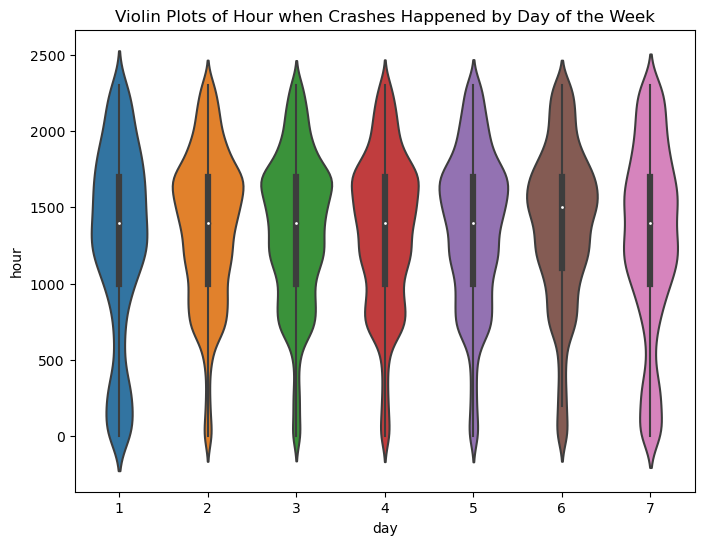

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="day", y="hour")
plt.title("Violin Plots of Hour when Crashes Happened by Day of the Week")
plt.show

In [31]:
df.groupby("day").hour.var()

day
1    389329.599463
2    238111.335382
3    238571.579011
4    249474.750452
5    256243.344632
6    262776.213029
7    366386.920192
Name: hour, dtype: float64

In [29]:
# Extract day of week
sun=df.loc[df.day == 1, "hour"]
mon=df.loc[df.day == 2, "hour"]
tues=df.loc[df.day == 3, "hour"]
wed=df.loc[df.day == 4, "hour"]
thur=df.loc[df.day == 5, "hour"]
fri=df.loc[df.day == 6, "hour"]
sat=df.loc[df.day == 7, "hour"]

In [ ]:
# Full Hypothesis

# H0: This is no difference in time of accidents between any group
# HA: There is a difference in time of accidents between any group

In [32]:
# ANOVA
stats.f_oneway(sun, mon, tues, wed, thur, fri, sat)

F_onewayResult(statistic=34.972520372232026, pvalue=1.8668260309203273e-42)

In [ ]:
# Full Hypothesis

# H0: This is no difference in time of accidents between any group
# HA: There is a difference in time of accidents between any group

In [35]:
# T-tests for Sunday
print(stats.ttest_ind(sun, mon, equal_var=False))
print(stats.ttest_ind(sun, tues, equal_var=False))
print(stats.ttest_ind(sun, wed, equal_var=False))
print(stats.ttest_ind(sun, thur, equal_var=False))
print(stats.ttest_ind(sun, fri, equal_var=False))
print(stats.ttest_ind(sun, sat, equal_var=True))

TtestResult(statistic=-8.941345616726114, pvalue=4.588575332921759e-19, df=9204.557888006277)
TtestResult(statistic=-7.66202219264, pvalue=2.0200737230142433e-14, df=8989.208698603596)
TtestResult(statistic=-6.361807717676779, pvalue=2.0886018771592446e-10, df=9233.056493157901)
TtestResult(statistic=-8.299725016856902, pvalue=1.1898487350561067e-16, df=9255.716573694943)
TtestResult(statistic=-9.975458753956067, pvalue=2.5911420194353023e-23, df=8848.433174117654)
TtestResult(statistic=-1.867372347938079, pvalue=0.0618734702255353, df=12251.0)


In [ ]:
# Reject the null hypothesis for all days except Saturday where we fail to reject the null hypothesis
# There is a significant difference between Sunday and all other days of the week, except Saturday

# While the p-value is close to 0.05 between Saturday and Sunday, given the significance of the p-value for sunday and all other days of the week,
# comparatively, Saturday isn't significant

In [36]:
# T-tests for Monday
print(stats.ttest_ind(mon, tues, equal_var=True))
print(stats.ttest_ind(mon, wed, equal_var=True))
print(stats.ttest_ind(mon, thur, equal_var=True))
print(stats.ttest_ind(mon, fri, equal_var=True))
print(stats.ttest_ind(mon, sat, equal_var=False))

TtestResult(statistic=1.813699896341775, pvalue=0.06974357568396897, df=15259.0)
TtestResult(statistic=3.3473939275866567, pvalue=0.0008177579950122274, df=14996.0)
TtestResult(statistic=0.8439342110641541, pvalue=0.39871943788799924, df=15215.0)
TtestResult(statistic=-1.082806444766679, pvalue=0.2789099416620765, df=16739.0)
TtestResult(statistic=7.905326934229422, pvalue=2.875295700925435e-15, df=13718.963005729744)


In [ ]:
# Reject the null hypothesis for Wednesday and Saturday while we fail to reject for Tuesday, Thursday, and Friday
# There is a significant difference between Monday and both Wednesday and Saturday, while the other 3 days are not significant

# While the p-value is close to 0.05 between Tuesday and Monday, given the significance of the p-value for Wednesday and Saturday, 
# 0.07 isn't that significant. Additionally, this is consistent with the determination for Saturday and Sunday

In [37]:
# T-tests for Tuesday
print(stats.ttest_ind(tues, wed, equal_var=True))
print(stats.ttest_ind(tues, thur, equal_var=True))
print(stats.ttest_ind(tues, fri, equal_var=True))
print(stats.ttest_ind(tues, sat, equal_var=False))

TtestResult(statistic=1.604096724194764, pvalue=0.10871289326436286, df=15665.0)
TtestResult(statistic=-0.9548130461749321, pvalue=0.33968677911002787, df=15884.0)
TtestResult(statistic=-2.990226178927103, pvalue=0.0027916073663610025, df=17408.0)
TtestResult(statistic=6.442035775468931, pvalue=1.2180504021194856e-10, df=13750.043388957178)


In [ ]:
# Reject the null hypothesis for Friday and Saturday while we fail to reject for Wednesday and Thursday
# There is a significant difference between Tuesday and both Friday and Saturday while the other 2 days are not significant

In [38]:
# T-tests for Wednesday
print(stats.ttest_ind(wed, thur, equal_var=True))
print(stats.ttest_ind(wed, fri, equal_var=True))
print(stats.ttest_ind(wed, sat, equal_var=False))

TtestResult(statistic=-2.509621759843957, pvalue=0.012096087010839768, df=15621.0)
TtestResult(statistic=-4.560665575376725, pvalue=5.134474433853389e-06, df=17145.0)
TtestResult(statistic=4.962524562858517, pvalue=7.040610408011587e-07, df=13903.98611324832)


In [ ]:
# Reject the null hypothesis for all days
# There is a significant difference between Wednesday and Thursday, Friday, and Saturday
# However, there is a more significant difference in when accidents occur on Wednesday vs. Friday and Saturday than between Wednesday and Thursday

In [39]:
# T-tests for Thursday
print(stats.ttest_ind(thur, fri, equal_var=True))
print(stats.ttest_ind(thur, sat, equal_var=False))

TtestResult(statistic=-1.9684513757480029, pvalue=0.0490320080999631, df=17364.0)
TtestResult(statistic=7.1733982936045875, pvalue=7.683041537187214e-13, df=14004.686382795351)


In [ ]:
# Reject the null hypothesis for both Friday and Saturday
# There is a significant difference between when accidents occur on Thursday compared to Friday and Saturday

In [40]:
# T-tests for Friday
print(stats.ttest_ind(fri, sat, equal_var=False))

TtestResult(statistic=9.095757013797511, pvalue=1.0646838866459606e-19, df=13930.128746235501)


In [ ]:
# Reject the null hypothesis
# There is a significant difference between when accidents occur on Friday and Saturday

### Scatterplots for Time Accidents Occur on each day of the week
---

In [45]:
# Find data points for each day of the week
sundf = df.loc[df.day == 1]
sundf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5096 entries, 14 to 52580
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5096 non-null   int64  
 1   year               5096 non-null   int64  
 2   month              5096 non-null   int64  
 3   day                5096 non-null   int64  
 4   hour               5096 non-null   float64
 5   collision_type     5096 non-null   object 
 6   injury_type        5096 non-null   object 
 7   primary_factor     5096 non-null   object 
 8   reported_location  5096 non-null   object 
 9   latitude           5096 non-null   float64
 10  longitude          5096 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 477.8+ KB


The r2-value is: 0.0001607278049823061
The line equation is: y = 2.28x + -3329.1


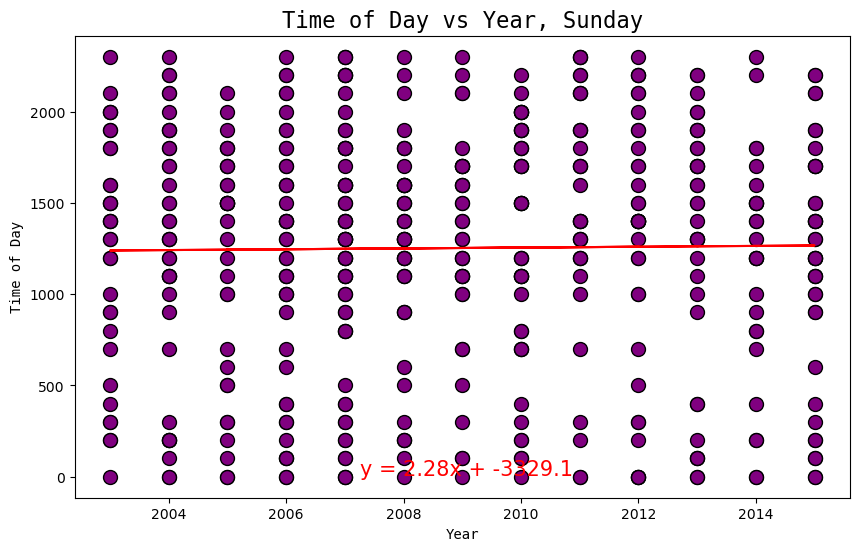

In [64]:
# Make the scatterplot for Sunday
# Step 1: Get the Data
x = sundf.sample(500).year
y = sundf.sample(500).hour

# Makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Make the canvas
plt.figure(figsize=(10,6))

# Make the basic plot
plt.scatter(x,y, facecolor="purple", edgecolor="black", s=100)
plt.plot(x,regress_values,"r-")

# Customizations
plt.title("Time of Day vs Year, Sunday", fontsize=16, fontfamily="monospace")
plt.xlabel("Year", fontfamily="monospace")
plt.ylabel("Time of Day", fontfamily="monospace")

plt.grid(color="lightgrey", linestyle="--", alpha=0)

plt.annotate(line_eq,(2007.25,8),fontsize=15,color="red")


print(f"The r2-value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")
plt.show()

### Scatterplots for Days per Month for various months
---

January 2003

In [17]:
# Find data points for January 2003
jan03_df = df.loc[(df.year == 2003) & (df.month == 1)].reset_index()
jan03_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            337 non-null    int64  
 1   index              337 non-null    int64  
 2   year               337 non-null    int64  
 3   month              337 non-null    int64  
 4   day                337 non-null    int64  
 5   hour               337 non-null    float64
 6   collision_type     337 non-null    object 
 7   injury_type        337 non-null    object 
 8   primary_factor     337 non-null    object 
 9   reported_location  337 non-null    object 
 10  latitude           337 non-null    float64
 11  longitude          337 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 31.7+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

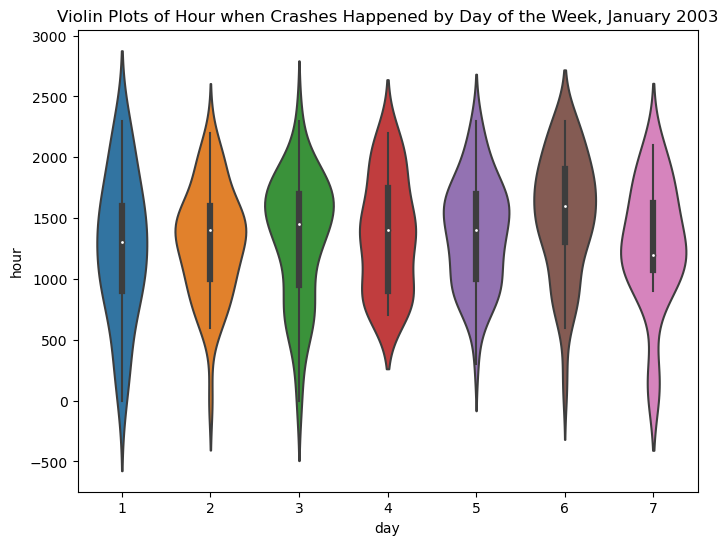

In [25]:
# May Violin Plot showing average time of day people are getting into accidents across each day of the week
plt.figure(figsize=(8,6))
sns.violinplot(data=jan03_df, x="day", y="hour")
plt.title("Violin Plots of Hour when Crashes Happened by Day of the Week, January 2003")
plt.show

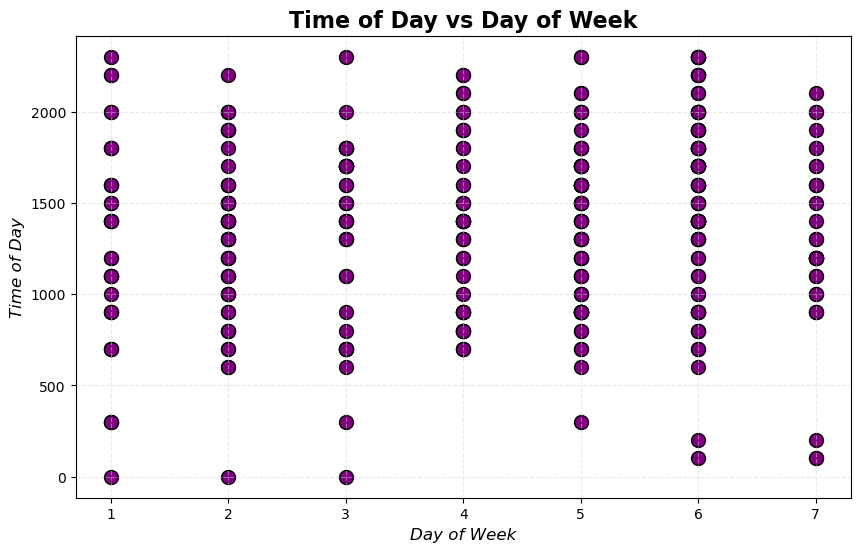

In [23]:
# Make the scatterplot
# Step 1: Get the Data
x = jan03_df.day
y = jan03_df.hour

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Day of Week", fontsize=12, fontstyle="italic")
plt.ylabel("Time of Day", fontsize=12, fontstyle="italic")
plt.title("Time of Day vs Day of Week", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

The r2-value is: 0.012679396121955285
The line equation is: y = 29.51x + 1252.07


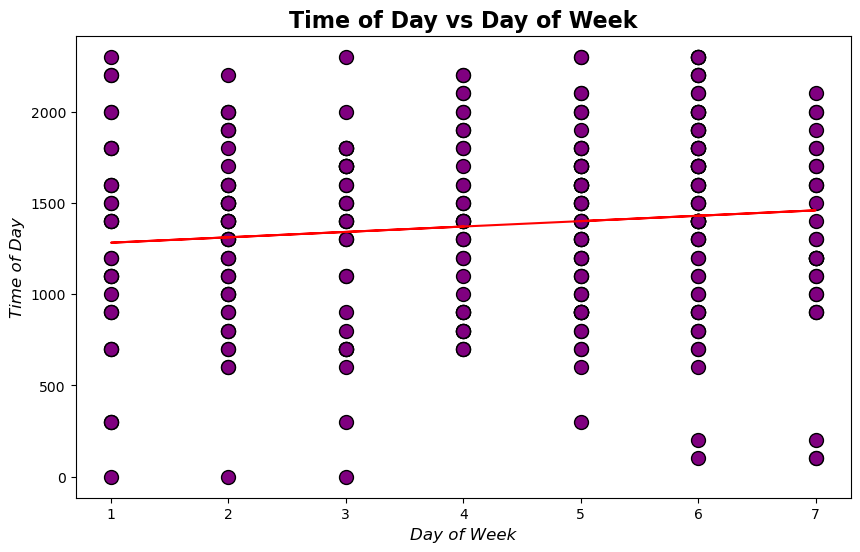

In [65]:
# Step 1: Get the Data
x = jan03_df.day
y = jan03_df.hour

# Makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Make the canvas
plt.figure(figsize=(10,6))

# Make the basic plot
plt.scatter(x,y, facecolor="purple", edgecolor="black", s=100)
plt.plot(x,regress_values,"r-")

# Customizations
plt.xlabel("Day of Week", fontsize=12, fontstyle="italic")
plt.ylabel("Time of Day", fontsize=12, fontstyle="italic")
plt.title("Time of Day vs Day of Week", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0)

plt.annotate(line_eq,(2007.25,8),fontsize=15,color="red")


print(f"The r2-value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")
plt.show()

January 2015

In [19]:
# Find data points for January 2015
jan15_df = df.loc[(df.year == 2015) & (df.month == 1)].reset_index()
jan15_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            325 non-null    int64  
 1   index              325 non-null    int64  
 2   year               325 non-null    int64  
 3   month              325 non-null    int64  
 4   day                325 non-null    int64  
 5   hour               325 non-null    float64
 6   collision_type     325 non-null    object 
 7   injury_type        325 non-null    object 
 8   primary_factor     325 non-null    object 
 9   reported_location  325 non-null    object 
 10  latitude           325 non-null    float64
 11  longitude          325 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 30.6+ KB


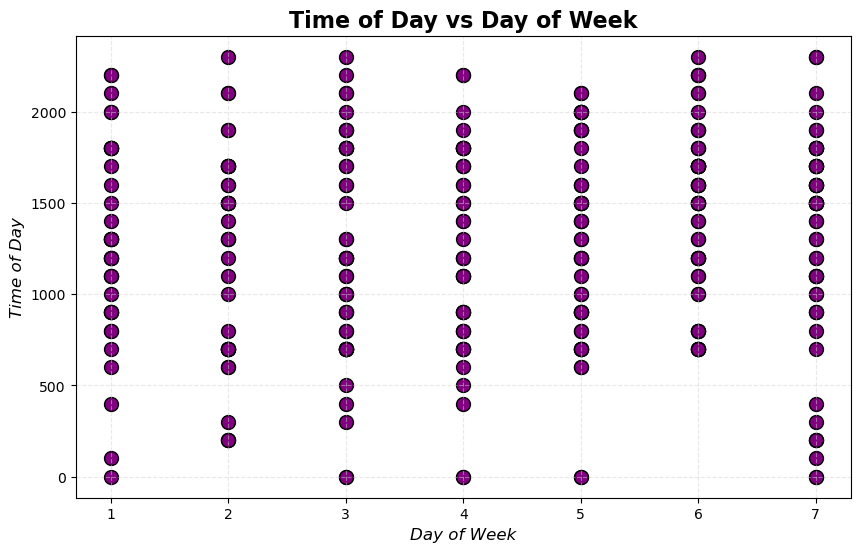

In [24]:
# Make the scatterplot
# Step 1: Get the Data
x = jan15_df.day
y = jan15_df.hour

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Day of Week", fontsize=12, fontstyle="italic")
plt.ylabel("Time of Day", fontsize=12, fontstyle="italic")
plt.title("Time of Day vs Day of Week", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

In [ ]:
# Do a t-test between the 2 datasets (maybe)

In [21]:
jan03_df.describe()

,level_0,index,year,month,day,hour,latitude,longitude
count,337.000000,337.000000,337.0,337.0,337.000000,337.000000,337.000000,337.000000
mean,50323.916914,51473.528190,2003.0,1.0,4.228487,1376.854599,34.518398,-76.263327
std,1272.394705,1381.395884,0.0,0.0,1.878296,492.259930,12.686723,28.029361
min,48354.000000,49321.000000,2003.0,1.0,1.000000,0.000000,0.000000,-86.677535
25%,49105.000000,50152.000000,2003.0,1.0,3.000000,1000.000000,39.136512,-86.540544
50%,50162.000000,51301.000000,2003.0,1.0,5.000000,1400.000000,39.164821,-86.528192
75%,51550.000000,52798.000000,2003.0,1.0,6.000000,1700.000000,39.178848,-86.508394
max,52526.000000,53885.000000,2003.0,1.0,7.000000,2300.000000,39.339104,0.000000


In [22]:
jan15_df.describe()

,level_0,index,year,month,day,hour,latitude,longitude
count,325.000000,325.00000,325.0,325.0,325.000000,325.000000,325.000000,325.000000
mean,304.360000,310.72000,2015.0,1.0,4.273846,1295.384615,37.596703,-83.076729
std,253.484122,259.57736,0.0,0.0,1.984996,548.125529,7.686347,16.984170
min,0.000000,0.00000,2015.0,1.0,1.000000,0.000000,0.000000,-86.670422
25%,81.000000,82.00000,2015.0,1.0,3.000000,900.000000,39.147058,-86.555296
50%,162.000000,164.00000,2015.0,1.0,4.000000,1300.000000,39.164272,-86.532577
75%,583.000000,597.00000,2015.0,1.0,6.000000,1700.000000,39.173028,-86.514816
max,816.000000,836.00000,2015.0,1.0,7.000000,2300.000000,39.334480,0.000000
